In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import random

In [65]:
class Component:
    def __init__(self, name):
        self.name = name
        self.failed = False
        self.failure_time = None

    def fail(self, time):
        self.failed = True
        self.failure_time = time

class Machine:
    def __init__(self, p1, p2, p3):
        self.components = [Component("A"), Component("B"), Component("C")]
        self.p1 = p1
        self.p2 = p2
        self.p3 = p3
        self.state = 0
        self.failed_components = 0
        self.state_transitions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

    def transition_state(self, time, num_failures):
        transitions = {
            (0, 1): 1,
            (1, 1): 2,
            (2, 1): 4,
            (0, 2): 3,
            (0, 3): 7,
            (3, 1): 6,
            (1, 2): 5
        }
        new_state = transitions.get((self.state, num_failures), None)
        if new_state is not None:
            self.state_transitions[new_state].append(time)
            self.state = new_state

    def run_simulation(self, duration, dt):
        time = 0
        while time < duration and self.state < 7:
            time += dt
            failure_prob = random.random()

            single_failure = False
            double_failure = False
            triple_failure = False

            failures_this_step = 0

            one_fail_prob = self.p1 * dt * max(1, 2*self.failed_components)
            two_fail_prob = self.p2 * dt * max(1, 2*self.failed_components)
            three_fail_prob = self.p3 * dt * max(1, 2*self.failed_components)

            if (failure_prob < one_fail_prob) & (self.failed_components <= len(self.components) - 1) :
                single_failure = True
                failures_this_step = 1
            elif (failure_prob < one_fail_prob + two_fail_prob) & (self.failed_components <= len(self.components) - 2) :
                double_failure = True
                failures_this_step = 2
            elif (failure_prob < one_fail_prob + two_fail_prob + three_fail_prob) & (self.failed_components <= len(self.components) - 3) :
                triple_failure = True
                failures_this_step = 3

            self.failed_components += failures_this_step
            
            self.transition_state(time, failures_this_step)    

            


In [66]:
one_eo = 0.0008
two_eo = 0.0002
three_eo = 0.0001
num_simulations = 10000
flight_duration = 500  #seconds
dt = 0.1



total_failures = {'A': 0, 'B': 0, 'C': 0}  # Keep track of how many times each component failed
state_transitions = {1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: []}

for i in range(num_simulations):
    machine = Machine(one_eo, two_eo, three_eo)
    machine.run_simulation(flight_duration, dt)
    for component in machine.components:
            if component.failed:
                total_failures[component.name] += 1
    for state, timestamps in machine.state_transitions.items():
        state_transitions[state].extend(timestamps)
    print(f"Simulation {i+1}/{num_simulations} completed.", end='\r')




Component A failures: 0
Component B failures: 0
Component C failures: 0
Transition 1: 30% of simulations
Transition 2: 9% of simulations
Transition 3: 8% of simulations
Transition 4: 4% of simulations
Transition 5: 2% of simulations
Transition 6: 4% of simulations
Transition 7: 4% of simulations


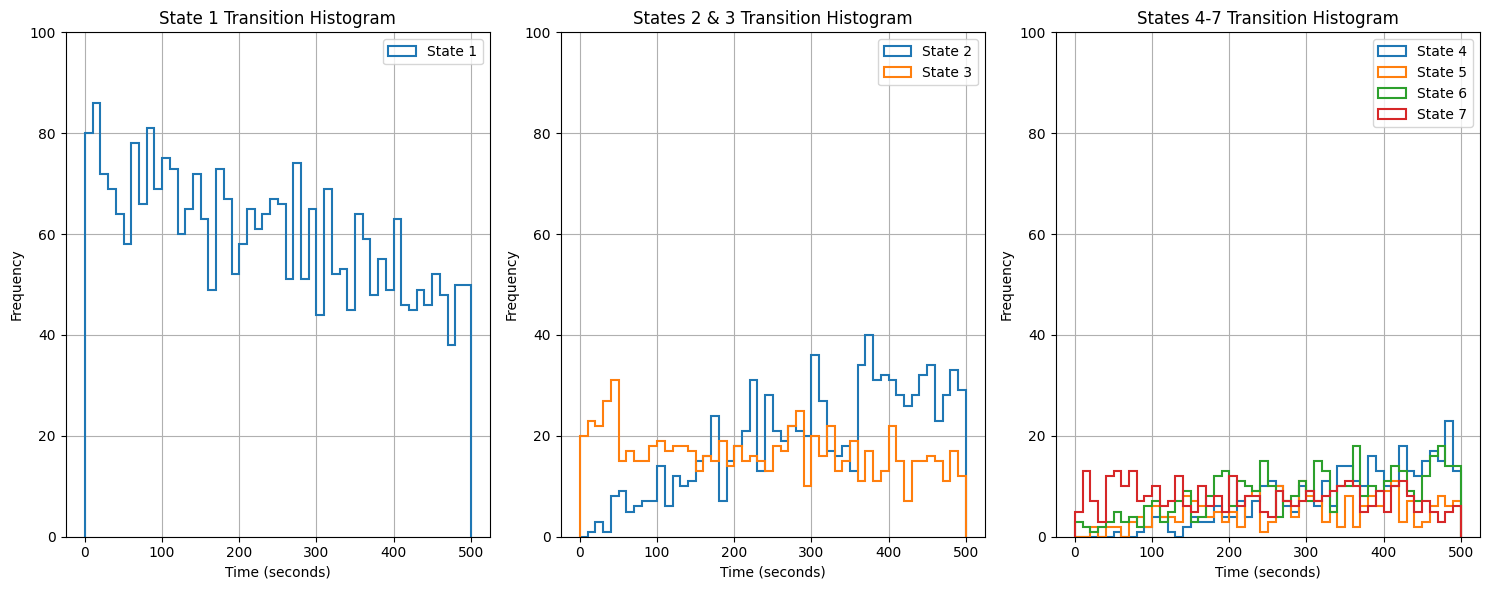

In [67]:
print("\nComponent A failures:", total_failures['A'])
print("Component B failures:", total_failures['B'])
print("Component C failures:", total_failures['C'])

for state, timestamps in state_transitions.items():
    percentage = round(len(timestamps) / num_simulations * 100)
    print(f"Transition {state}: {percentage}% of simulations")




# Create separate histograms for each range of states
plt.figure(figsize=(15, 6))

# First histogram containing state 1
plt.subplot(1, 3, 1)
for state in [1]:
    plt.hist(state_transitions[state], bins=range(0, 510, 10), label=f"State {state}", lw=1.5, histtype='step')
plt.title("State 1 Transition Histogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim((0,100))
plt.legend()
plt.grid(True)

# Second histogram containing states 2 and 3
plt.subplot(1, 3, 2)
for state in [2, 3]:
    plt.hist(state_transitions[state], bins=range(0, 510, 10), label=f"State {state}", lw=1.5, histtype='step')
plt.title("States 2 & 3 Transition Histogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim((0,100))
plt.legend()
plt.grid(True)

# Third histogram containing states 4 to 7
plt.subplot(1, 3, 3)
for state in [4, 5, 6, 7]:
    plt.hist(state_transitions[state], bins=range(0, 510, 10), label=f"State {state}", lw=1.5, histtype='step')
plt.title("States 4-7 Transition Histogram")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.ylim((0,100))
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()